# Data Import and data structure read

In [2]:
import pandas as pd

# Read CSV file
df = pd.read_csv("dataset.csv")

# Display the first 5 rows
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:27:16   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:56:29   
2        3.0  2015-01-22 20:39:28  2015-01-22 21:09:09   
3        3.0  2015-02-03 21:21:45  2015-02-03 22:13:00   
4        3.0  2015-02-15 02:40:36  2015-02-15 03:20:26   

                           store_id store_primary_category  order_protocol  \
0  df263d996281d984952c07998dc54358               american             1.0   
1  f0ade77b43923b38237db569b016ba25                mexican             2.0   
2  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
3  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
4  f0ade77b43923b38237db569b016ba25                    NaN             1.0   

   total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0            4      3441                   4             557            1239   
1            1      1900                   1            1400            1400   
2            1      1900                   1            1900            1900   
3            6      6900                   5             600            1800   
4            3      3900                   3            1100            1600   

   total_onshift_partners  total_busy_partners  total_outstanding_orders  
0                    33.0                 14.0                      21.0  
1                     1.0                  2.0                       2.0  
2                     1.0                  0.0                       0.0  
3                     1.0                  1.0                       2.0  
4                     6.0                  6.0                       9.0

#### Data Description:
- market_id : integer id for the market where the restaurant lies
- created_at : the timestamp at which the order was placed
- actual_delivery_time : the timestamp when the order was delivered
- store_primary_category : category for the restaurant
- order_protocol : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)
- total_items subtotal : final price of the order
- num_distinct_items : the number of distinct items in the order
- min_item_price : price of the cheapest item in the order
- max_item_price : price of the costliest item in order
- total_onshift_partners : number of delivery partners on duty at the time order was placed
- total_busy_partners : number of delivery partners attending to other tasks
- total_outstanding_orders : total number of orders to be fulfilled at the moment

In [3]:
df.shape

(197428, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [5]:
# Removing rows with NA value
df = df.dropna()

In [6]:
# Converting data to correct data types
df = df.astype({"market_id": int, "created_at": "datetime64[ns]", "actual_delivery_time": "datetime64[ns]",
                "store_id": str, "store_primary_category": str, "order_protocol": "category",
                "total_onshift_partners": int, "total_busy_partners": int, "total_outstanding_orders": int})

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176248 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 176248 non-null  int64         
 1   created_at                176248 non-null  datetime64[ns]
 2   actual_delivery_time      176248 non-null  datetime64[ns]
 3   store_id                  176248 non-null  object        
 4   store_primary_category    176248 non-null  object        
 5   order_protocol            176248 non-null  category      
 6   total_items               176248 non-null  int64         
 7   subtotal                  176248 non-null  int64         
 8   num_distinct_items        176248 non-null  int64         
 9   min_item_price            176248 non-null  int64         
 10  max_item_price            176248 non-null  int64         
 11  total_onshift_partners    176248 non-null  int64         
 12  total_b

In [7]:
# Creating target variable delivery_time (first computing number of seconds then dividing by 60 to get minutes)
df["delivery_time"] = df.apply(lambda row: round((row["actual_delivery_time"] - row["created_at"]).total_seconds()/60, 2), axis=1)

# Dropped actual_delivery_time because that is not going to be helpful anymore
df = df.drop('actual_delivery_time', axis=1)
print(df['delivery_time'].describe())

count    176248.000000
mean         47.764204
std          27.654871
min           1.680000
25%          35.080000
50%          44.370000
75%          56.370000
max        6231.320000
Name: delivery_time, dtype: float64


We can see that that their are outliers, lets treat them first

In [8]:
df.describe()

market_id                     created_at    total_items  \
count  176248.000000                         176248  176248.000000   
mean        2.743747  2015-02-04 19:35:43.333773824       3.204592   
min         1.000000            2015-01-21 15:22:03       1.000000   
25%         2.000000     2015-01-29 01:37:01.500000       2.000000   
50%         2.000000     2015-02-05 02:30:12.500000       3.000000   
75%         4.000000  2015-02-12 00:52:58.249999872       4.000000   
max         6.000000            2015-02-18 06:00:44     411.000000   
std         1.330911                            NaN       2.673899   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  176248.000000       176248.000000   176248.000000   176248.000000   
mean     2696.498939            2.674589      684.937730     1159.886994   
min         0.000000            1.000000      -86.000000        0.000000   
25%      1408.000000            1.000000      299.000000      799.000000   
50%      2221.000000            2.000000      595.000000     1095.000000   
75%      3407.000000            3.000000      942.000000     1395.000000   
max     26800.000000           20.000000    14700.000000    14700.000000   
std      1828.922584            1.625558      519.911425      560.784510   

       total_onshift_partners  total_busy_partners  total_outstanding_orders  \
count           176248.000000        176248.000000             176248.000000   
mean                44.905276            41.845434                 58.206800   
min                 -4.000000            -5.000000                 -6.000000   
25%                 17.000000            15.000000                 17.000000   
50%                 37.000000            35.000000                 41.000000   
75%                 65.000000            62.000000                 85.000000   
max                171.000000           154.000000                285.000000   
std                 34.529394            32.154573                 52.708344   

       delivery_time  
count  176248.000000  
mean       47.764204  
min         1.680000  
25%        35.080000  
50%        44.370000  
75%        56.370000  
max      6231.320000  
std        27.654871

In [9]:
from scipy.stats import zscore

columns_with_outliers = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
                        'max_item_price', 'total_onshift_partners', 'total_busy_partners',
                        'total_outstanding_orders', 'delivery_time']

for column in columns_with_outliers:
    df['z_score'] = zscore(df[column])
    outliers = df[df['z_score'].abs() > 3]
    print(f"Number of outliers for column {column} is {outliers.shape[0]}")


Number of outliers for column total_items is 2259
Number of outliers for column subtotal is 3361
Number of outliers for column num_distinct_items is 2646
Number of outliers for column min_item_price is 2509
Number of outliers for column max_item_price is 2803
Number of outliers for column total_onshift_partners is 433
Number of outliers for column total_busy_partners is 238
Number of outliers for column total_outstanding_orders is 1535
Number of outliers for column delivery_time is 610


In [10]:
# As number of outliers is pretty small in number, we can remove them

for column in columns_with_outliers:
    df['z_score'] = zscore(df[column])
    df = df[df['z_score'].abs() <= 3]

df.shape


(161186, 15)

In [11]:
# Get day of week, hour of day from created_at
df['created_at_day'] = df['created_at'].dt.dayofweek
df['created_at_hour'] = df['created_at'].dt.hour
df = df.drop('created_at', axis=1)
df = df.drop('z_score', axis=1)


In [12]:
df.head()

market_id                          store_id store_primary_category  \
0           1  df263d996281d984952c07998dc54358               american   
1           2  f0ade77b43923b38237db569b016ba25                mexican   
8           2  f0ade77b43923b38237db569b016ba25                 indian   
14          1  ef1e491a766ce3127556063d49bc2f98                italian   
15          1  ef1e491a766ce3127556063d49bc2f98                italian   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
8             3.0            4      4771                   3             820   
14            1.0            1      1525                   1            1525   
15            1.0            2      3620                   2            1425   

    max_item_price  total_onshift_partners  total_busy_partners  \
0             1239                      33                   14   
1             1400                       1                    2   
8             1604                       8                    6   
14            1525                       5                    6   
15            2195                       5                    5   

    total_outstanding_orders  delivery_time  created_at_day  created_at_hour  
0                         21          62.98               4               22  
1                          2          67.07               1               21  
8                         18          26.43               0                0  
14                         8          37.88               3                3  
15                         7          49.80               1                2

In [13]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['market_id','store_id', 'store_primary_category', 'order_protocol', 'created_at_day', 'created_at_hour']
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [14]:
df.market_id.value_counts()

market_id
1    48565
3    41988
0    34054
2    19671
4    16322
5      586
Name: count, dtype: int64

In [15]:
df.store_id.value_counts()

store_id
4647    874
5430    765
2579    730
4563    721
1592    675
       ... 
321       1
928       1
3070      1
3179      1
1029      1
Name: count, Length: 5556, dtype: int64

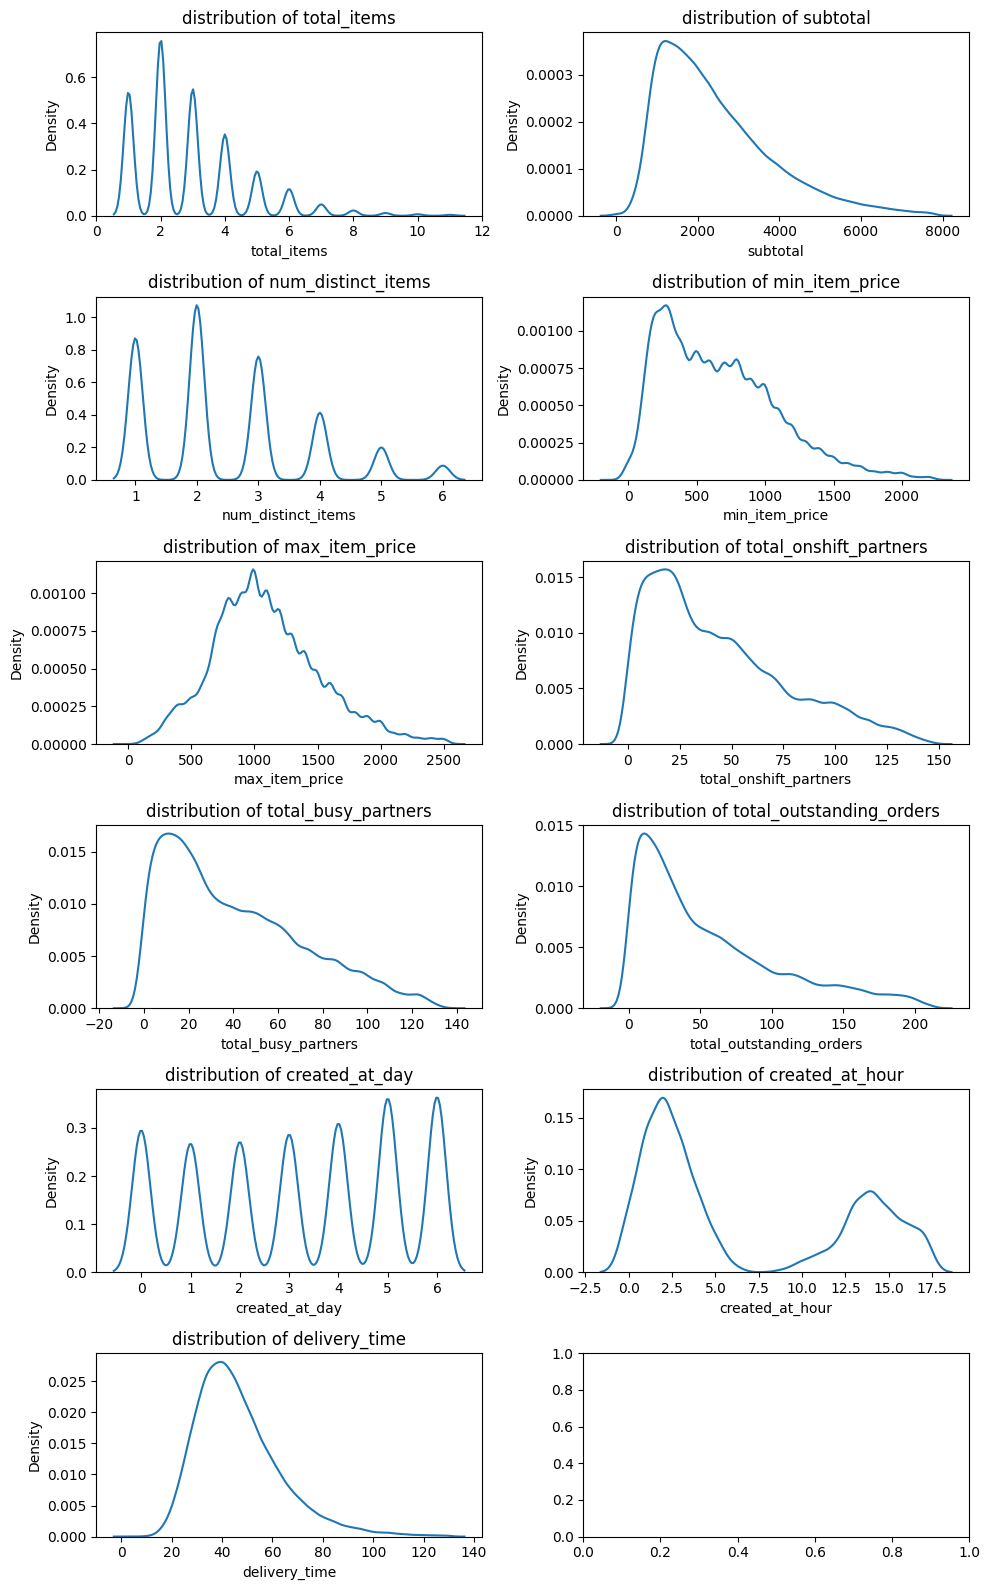

In [16]:
import seaborn
import matplotlib.pyplot as plt

fig, axes = plt.subplots(6, 2, figsize=(10, 16))  # 2x2 grid of subplots

plot_columns = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
                        'max_item_price', 'total_onshift_partners', 'total_busy_partners',
                        'total_outstanding_orders', 'created_at_day', 'created_at_hour', 'delivery_time']

for i, col in enumerate(plot_columns):
    ax = axes[i // 2, i % 2]  # Get subplot location
    seaborn.kdeplot(data=df, x=col, ax=ax)
    ax.set_title(f"distribution of {col}")

plt.tight_layout()
plt.show()

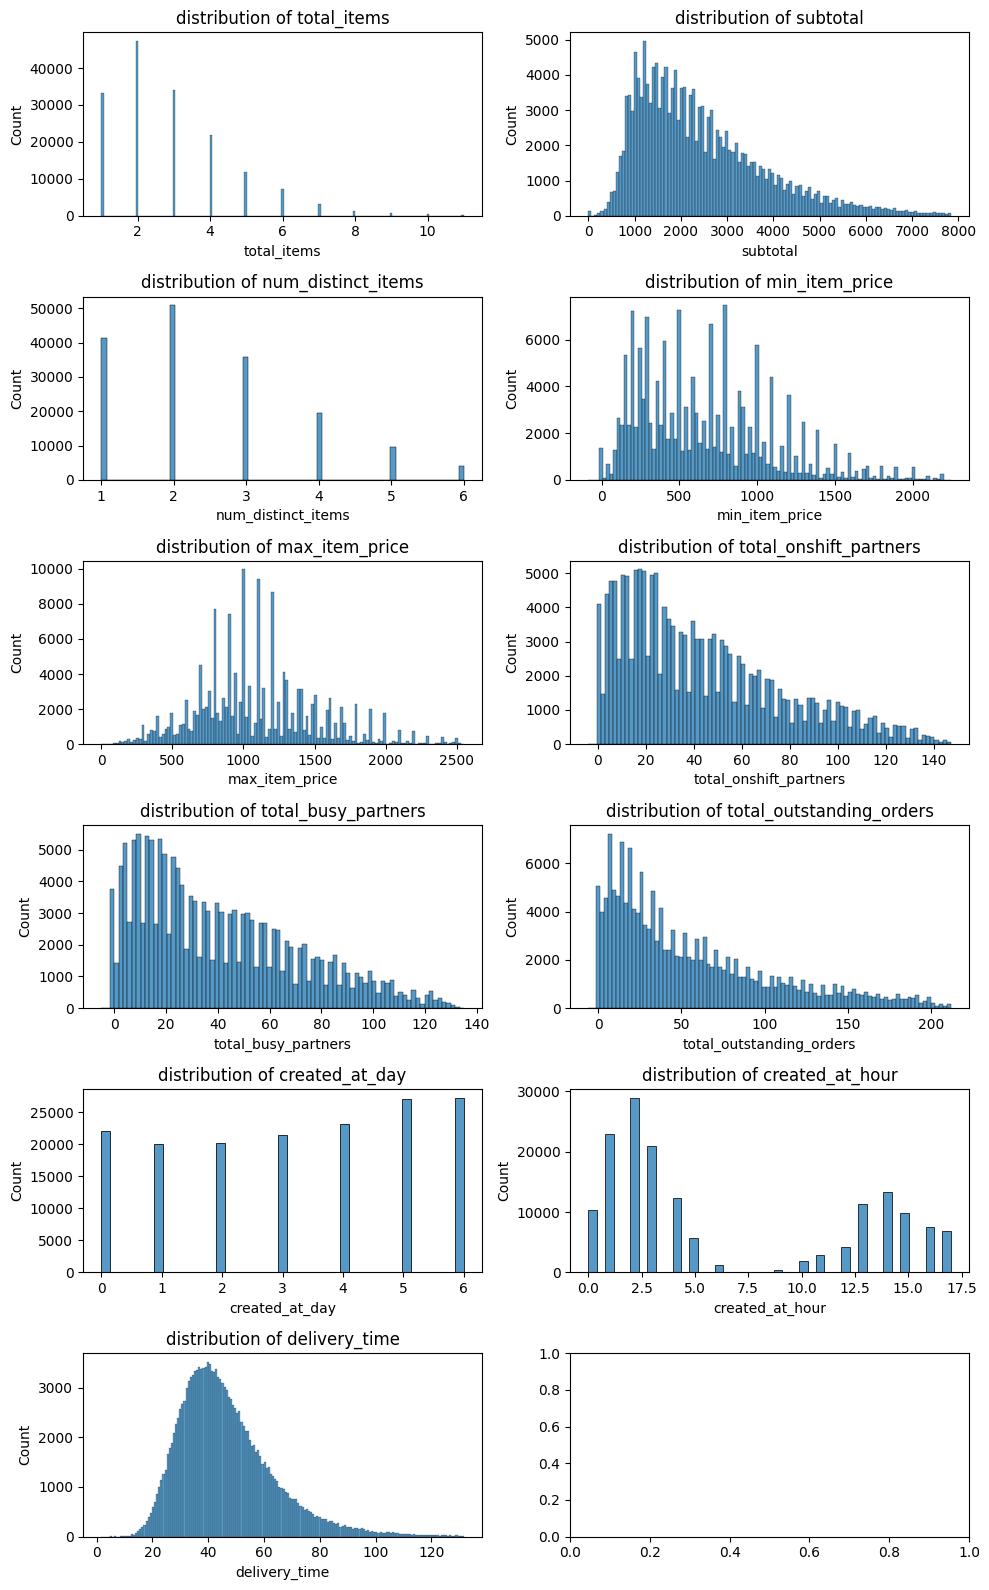

In [17]:
fig, axes = plt.subplots(6, 2, figsize=(10, 16))  # 2x2 grid of subplots

plot_columns = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
                        'max_item_price', 'total_onshift_partners', 'total_busy_partners',
                        'total_outstanding_orders', 'created_at_day', 'created_at_hour', 'delivery_time']

for i, col in enumerate(plot_columns):
    ax = axes[i // 2, i % 2]  # Get subplot location
    seaborn.histplot(data=df, x=col, ax=ax)
    ax.set_title(f"distribution of {col}")

plt.tight_layout()
plt.show()

<Axes: >

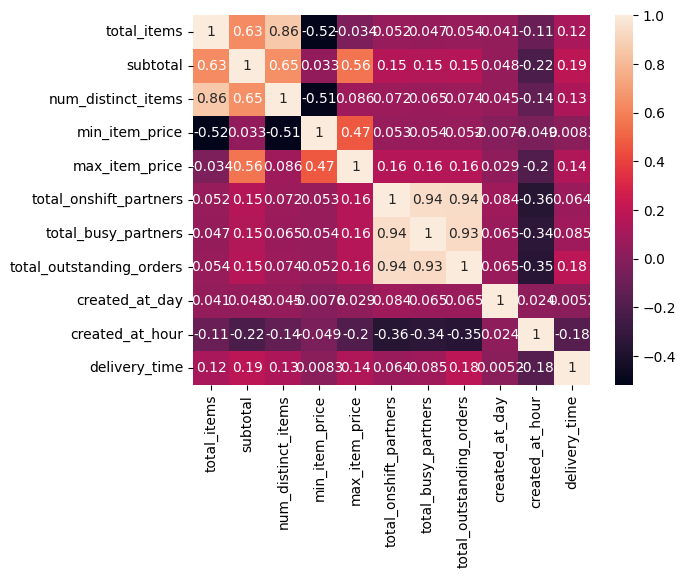

In [18]:
seaborn.heatmap(df[plot_columns].corr(),annot=True)


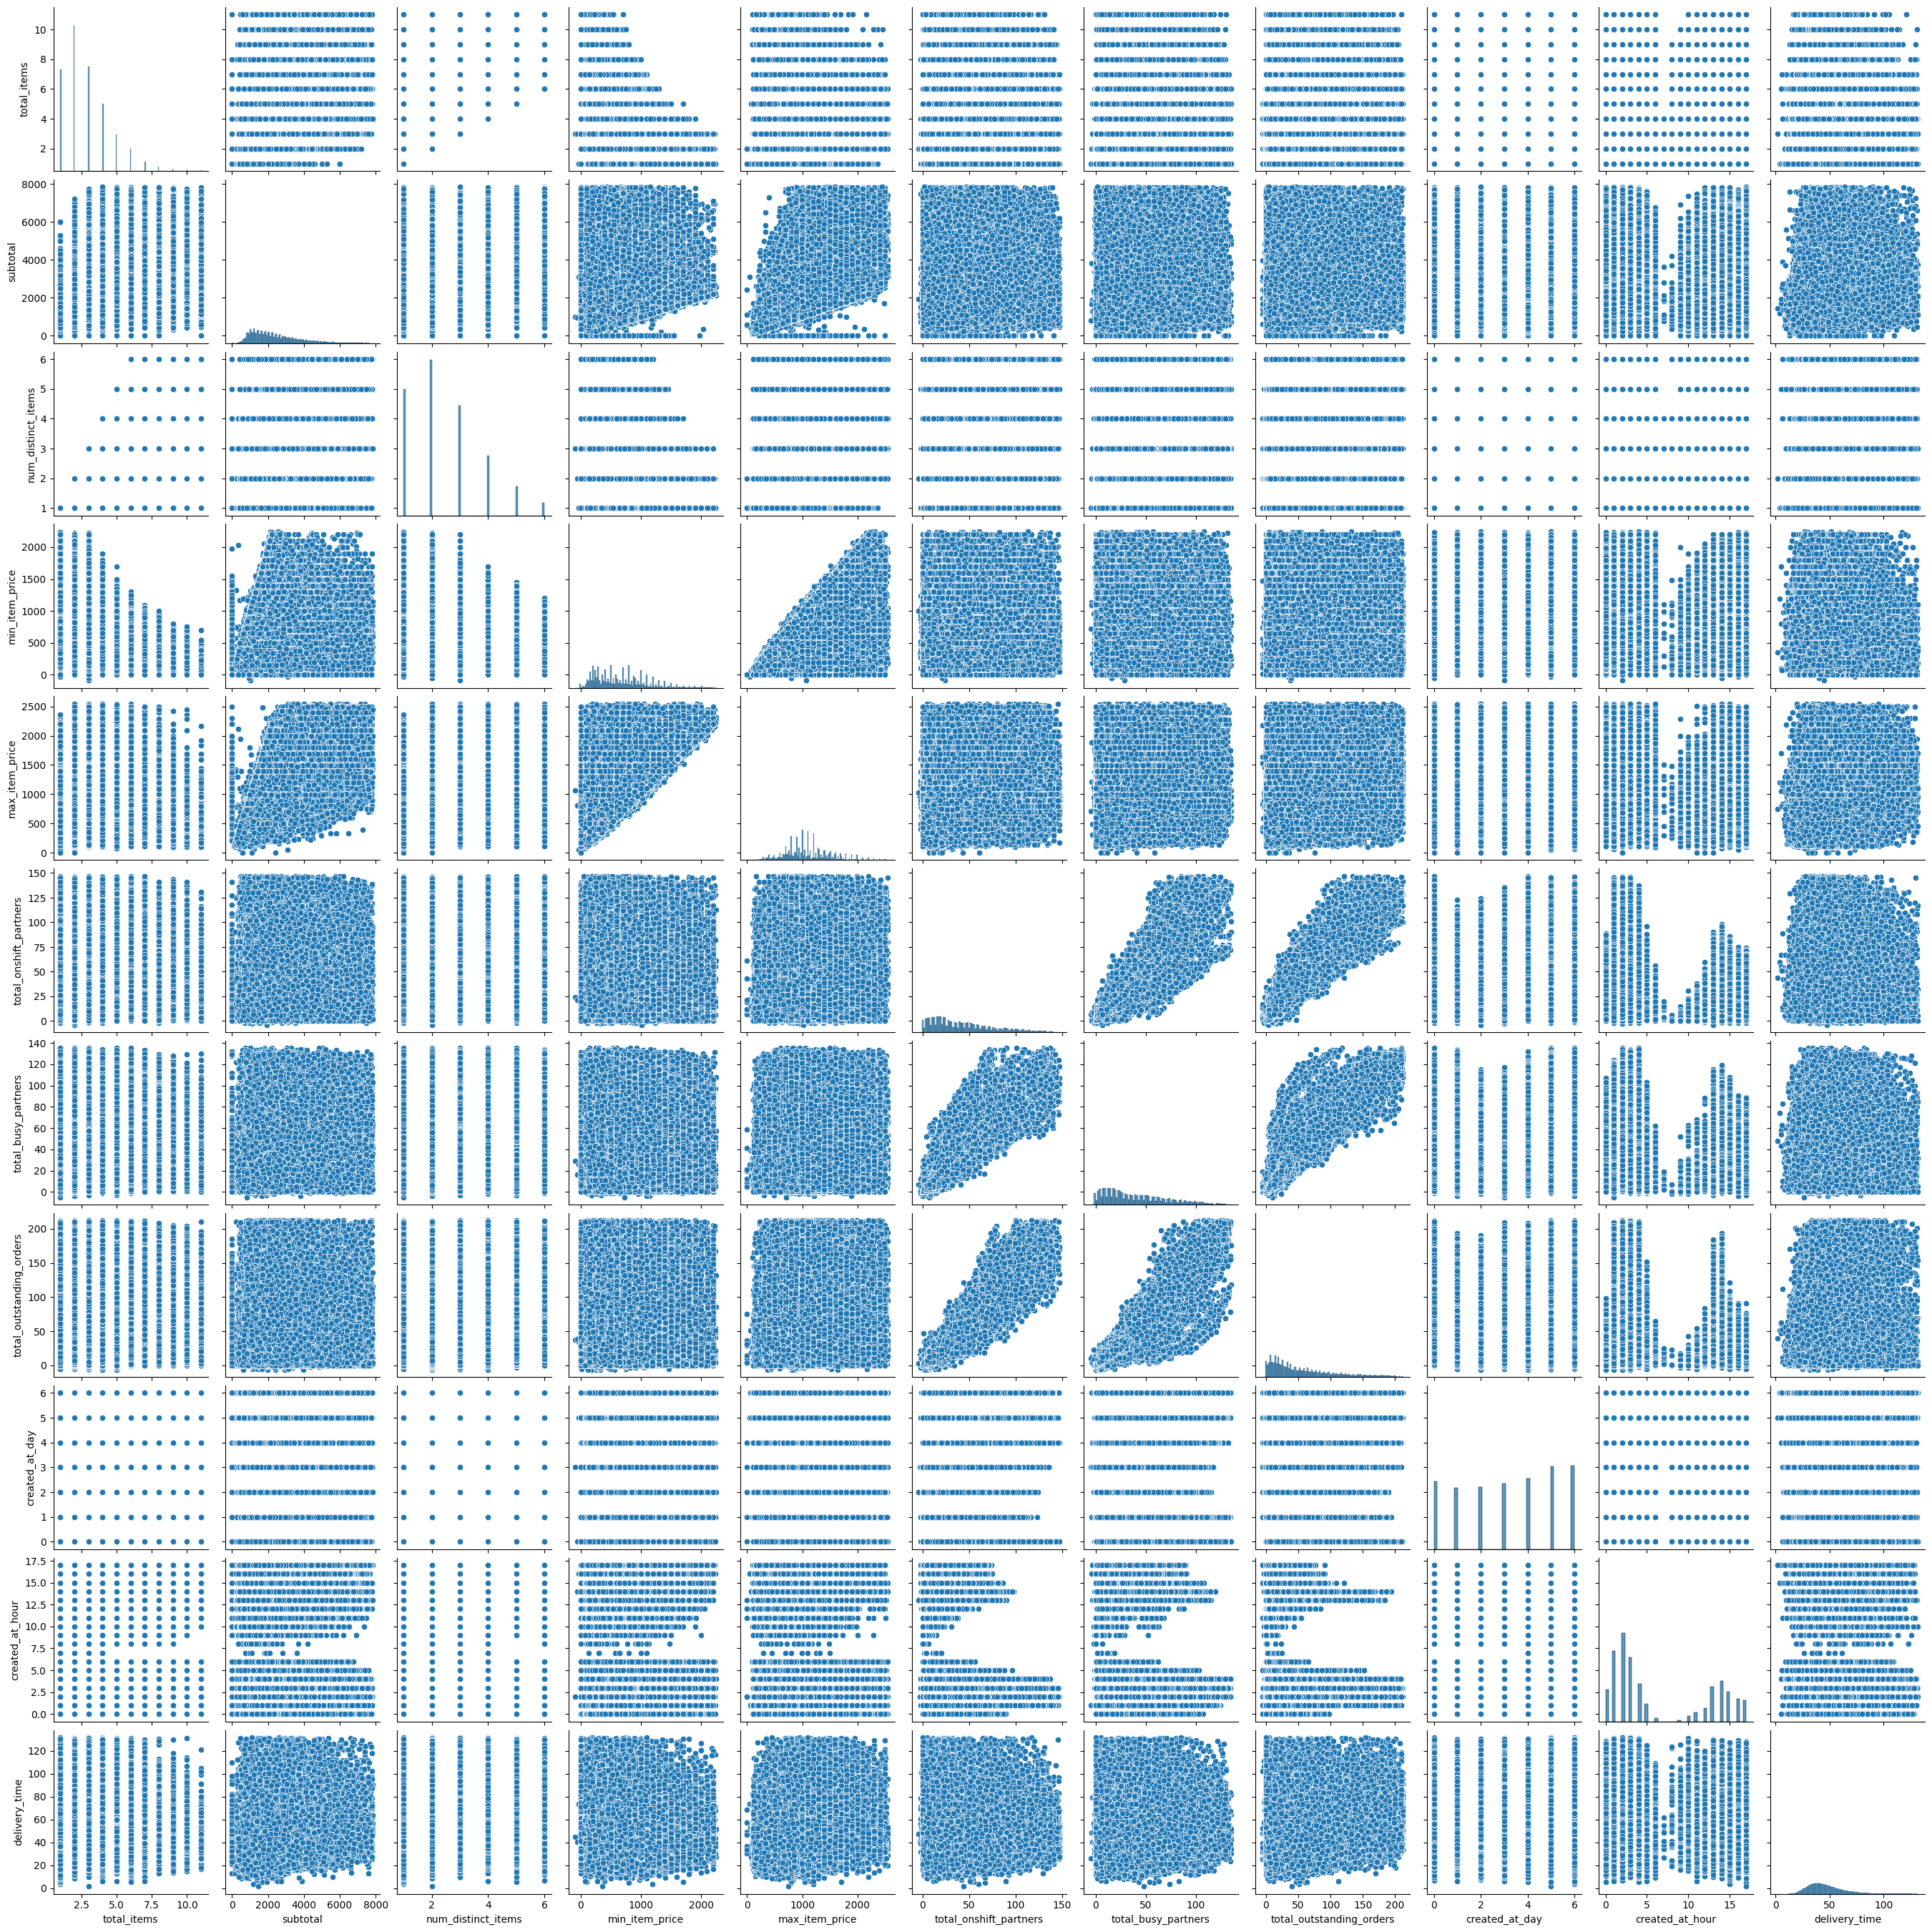

In [19]:
seaborn.pairplot(df[plot_columns])


### Test-Train Split

In [20]:
from sklearn.model_selection import train_test_split

# Example dataset
X = df.drop(columns=['delivery_time'])  # Features
y = df['delivery_time']  # Target variable

# Splitting data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling the data for neural networks.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161186 entries, 0 to 197427
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 161186 non-null  int64  
 1   store_id                  161186 non-null  int64  
 2   store_primary_category    161186 non-null  int64  
 3   order_protocol            161186 non-null  int64  
 4   total_items               161186 non-null  int64  
 5   subtotal                  161186 non-null  int64  
 6   num_distinct_items        161186 non-null  int64  
 7   min_item_price            161186 non-null  int64  
 8   max_item_price            161186 non-null  int64  
 9   total_onshift_partners    161186 non-null  int64  
 10  total_busy_partners       161186 non-null  int64  
 11  total_outstanding_orders  161186 non-null  int64  
 12  delivery_time             161186 non-null  float64
 13  created_at_day            161186 non-null  int64 

In [22]:
from sklearn.preprocessing import StandardScaler

# Select only numerical columns
num_cols = ['total_items', 'num_distinct_items', 'min_item_price', 'max_item_price',
             'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']
cat_cols = ['market_id', 'store_id', 'store_primary_category', 'order_protocol', 
            'created_at_day', 'created_at_hour']

# convert categorical columns to 'category' data type so that they are not affected by standard scaler
for col in cat_cols:
    X_train[col] = X_train[col].astype("category")
    X_test[col] = X_test[col].astype("category")

scaler = StandardScaler()

# If using train-test split:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use transform to avoid data leakage

In [23]:
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

### Defining NN architecture


Basic Feedforward Neural Network (Baseline)

In [27]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, activation='relu', input_shape=(14,)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Output layer for regression
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

/Users/vaibhavmotwani/Business Cases/Porter_NN/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Step: Train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32,
                    validation_data=(X_test_scaled, y_test_scaled))

Epoch 1/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 3s 778us/step - loss: 0.6963 - mae: 0.6302 - val_loss: 0.7261 - val_mae: 0.6429
Epoch 2/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 3s 764us/step - loss: 0.7011 - mae: 0.6319 - val_loss: 0.7271 - val_mae: 0.6403
Epoch 3/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 3s 784us/step - loss: 0.6966 - mae: 0.6303 - val_loss: 0.7303 - val_mae: 0.6501
Epoch 4/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 3s 776us/step - loss: 0.6919 - mae: 0.6282 - val_loss: 0.7258 - val_mae: 0.6415
Epoch 5/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 3s 811us/step - loss: 0.6992 - mae: 0.6310 - val_loss: 0.7282 - val_mae: 0.6414
Epoch 6/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 3s 801us/step - loss: 0.6874 - mae: 0.6282 - val_loss: 0.7282 - val_mae: 0.6384
Epoch 7/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 3s 807us/step - loss: 0.6943 - mae: 0.6289 - val_loss: 0.7273 - val_mae: 0.6421
Epoch 8/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 3s 807us/step - loss: 0.6924 - mae: 0.6293 - val_loss: 0.7244 - val_mae: 0.6396
Epoch 9/50
4030/4030 ━━━

In [31]:
from sklearn.metrics import mean_squared_error

# Step: Evaluate the model
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_scaled, y_pred)
print(f'Mean Squared Error on Test Data: {mse}')

1008/1008 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
Mean Squared Error on Test Data: 0.7254450451066452


In [35]:
import numpy as np
mse = mean_squared_error(y_test_scaled, y_pred=np.full(y_test_scaled.shape[0], np.mean(y_test_scaled)))
print(f'Mean Squared Error on Test Data: {mse}')

Mean Squared Error on Test Data: 0.9951185550385307


Deeper Network with Batch Normalization and Dropout (Prevents Overfitting)

In [36]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(14,)),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])

/Users/vaibhavmotwani/Business Cases/Porter_NN/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
# Step: Train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32,
                    validation_data=(X_test_scaled, y_test_scaled))

# Step: Evaluate the model
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_scaled, y_pred)
print(f'Mean Squared Error on Test Data: {mse}')

Epoch 1/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.7308 - mae: 0.6451 - val_loss: 0.7276 - val_mae: 0.6469
Epoch 2/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.7341 - mae: 0.6461 - val_loss: 0.7260 - val_mae: 0.6423
Epoch 3/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.7349 - mae: 0.6466 - val_loss: 0.7205 - val_mae: 0.6393
Epoch 4/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.7346 - mae: 0.6469 - val_loss: 0.7229 - val_mae: 0.6397
Epoch 5/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.7313 - mae: 0.6453 - val_loss: 0.7231 - val_mae: 0.6425
Epoch 6/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.7368 - mae: 0.6490 - val_loss: 0.7269 - val_mae: 0.6444
Epoch 7/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.7346 - mae: 0.6469 - val_loss: 0.7231 - val_mae: 0.6411
Epoch 8/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.7356 - mae: 0.6476 - val_loss: 0.7231 - val_mae: 0.6404
Epoch 9/50
4030/4030 ━━━━━━━━━━━━━━━━━━━

Wide and Deep Network (More Capacity)

In [41]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(14,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [42]:
# Step: Train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32,
                    validation_data=(X_test_scaled, y_test_scaled))

# Step: Evaluate the model
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_scaled, y_pred)
print(f'Mean Squared Error on Test Data: {mse}')

Epoch 1/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.8360 - mae: 0.6920 - val_loss: 0.7847 - val_mae: 0.6792
Epoch 2/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.7857 - mae: 0.6686 - val_loss: 0.7700 - val_mae: 0.6705
Epoch 3/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.7626 - mae: 0.6592 - val_loss: 0.7685 - val_mae: 0.6605
Epoch 4/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.7604 - mae: 0.6583 - val_loss: 0.7504 - val_mae: 0.6570
Epoch 5/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.7570 - mae: 0.6547 - val_loss: 0.7402 - val_mae: 0.6505
Epoch 6/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.7401 - mae: 0.6487 - val_loss: 0.7431 - val_mae: 0.6519
Epoch 7/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.7387 - mae: 0.6473 - val_loss: 0.7407 - val_mae: 0.6385
Epoch 8/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.7323 - mae: 0.6454 - val_loss: 0.7313 - val_mae: 0.6450
Epoch 9/50
4030/4030 ━━━━━━━━━━━━━━━━━━━

Alternative Activation Functions (Leaky ReLU)

In [43]:
from tensorflow.keras.layers import LeakyReLU

model = Sequential([
    Dense(128),
    LeakyReLU(alpha=0.01),
    Dense(64),
    LeakyReLU(alpha=0.01),
    Dense(32),
    LeakyReLU(alpha=0.01),
    Dense(1, activation='linear')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

/Users/vaibhavmotwani/Business Cases/Porter_NN/.venv/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [44]:
# Step: Train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32,
                    validation_data=(X_test_scaled, y_test_scaled))

# Step: Evaluate the model
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_scaled, y_pred)
print(f'Mean Squared Error on Test Data: {mse}')

Epoch 1/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 5s 958us/step - loss: 0.8257 - mae: 0.6889 - val_loss: 0.7839 - val_mae: 0.6602
Epoch 2/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 4s 930us/step - loss: 0.7774 - mae: 0.6657 - val_loss: 0.7754 - val_mae: 0.6716
Epoch 3/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 4s 966us/step - loss: 0.7645 - mae: 0.6602 - val_loss: 0.7627 - val_mae: 0.6553
Epoch 4/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 4s 922us/step - loss: 0.7606 - mae: 0.6576 - val_loss: 0.7706 - val_mae: 0.6565
Epoch 5/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 4s 931us/step - loss: 0.7592 - mae: 0.6576 - val_loss: 0.7517 - val_mae: 0.6526
Epoch 6/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 4s 936us/step - loss: 0.7479 - mae: 0.6536 - val_loss: 0.7581 - val_mae: 0.6648
Epoch 7/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 4s 954us/step - loss: 0.7338 - mae: 0.6481 - val_loss: 0.7403 - val_mae: 0.6464
Epoch 8/50
4030/4030 ━━━━━━━━━━━━━━━━━━━━ 4s 951us/step - loss: 0.7305 - mae: 0.6460 - val_loss: 0.7391 - val_mae: 0.6411
Epoch 9/50
4030/4030 ━━━

### Leading Questions:

Answers to Leading Questions:

1. Defining the problem statements and where can this and modifications of this be used?
	- The problem is to predict the estimated food delivery time based on restaurant location, food items ordered, and delivery partner details.
	- Use Cases:
	- Food Delivery Services: Optimizing delivery times for apps like Zomato, Swiggy, Uber Eats.
	- E-commerce Logistics: Estimating delivery time for same-day delivery services.
	- Ride-Hailing Services: Predicting arrival times for taxis or bike rides.
	- Grocery & Medicine Delivery: Enhancing estimated time-of-arrival (ETA) predictions for quick commerce services.

2. List 3 functions the pandas datetime provides with one-line explanation.
	- pd.to_datetime() → Converts a column to datetime format.
	- dt.weekday → Extracts the day of the week (0 for Monday, 6 for Sunday).
	- dt.hour → Extracts the hour from a datetime column.

3. Short note on datetime, timedelta, and time span (period)
	- datetime: Represents a specific point in time (e.g., 2023-10-10 12:30:45).
	- timedelta: Represents the difference between two datetime objects (e.g., 2 days, 3 hours).
	- Period: Represents a span of time, such as a month or year (e.g., 2023-10 for October 2023).

4. Why do we need to check for outliers in our data?
	- Outliers can distort model predictions by pulling the learned pattern toward extreme values.
	- They can cause issues in gradient-based learning (e.g., Neural Networks).
	- They can affect performance metrics, leading to unreliable results- 
5. Name 3 outlier removal methods?
	- Z-score method: Removes values beyond a certain standard deviation threshold (e.g., ±3).
	- IQR (Interquartile Range) method: Removes values outside Q1 - 1.5*IQR and Q3 + 1.5*IQR.
	- Isolation Forest: A machine learning algorithm that detects anomalies based on data partitions.

6. What classical machine learning methods can we use for this problem?
	- Linear Regression → If the relationship between features and delivery time is linear.
	- Random Forest Regressor → Captures nonlinear relationships and interactions between features.
	- Gradient Boosting (XGBoost, LightGBM) → Handles complex patterns efficiently with better generalization.

7. Why is scaling required for neural networks?
	- Neural networks perform better when features are scaled, as it prevents large weight updates and helps in faster convergence.
	- Scaling keeps all features within the same range, preventing any single feature from dominating the training process.

8. Briefly explain your choice of optimizer.
	- Adam Optimizer → It combines momentum and adaptive learning rate, making it effective for large datasets and non-stationary objectives.
	- Alternative: RMSprop → Works well for sequential data where learning rates need to adapt over time.

9. Which activation function did you use and why?
	- ReLU (Rectified Linear Unit) → It is computationally efficient and prevents the vanishing gradient problem.
	- Alternative: Leaky ReLU → Helps when data contains a lot of zero or negative values.

10. Why does a neural network perform well on a large dataset?
	- More data reduces overfitting, allowing the network to generalize better.
	- Deep networks require large datasets to capture complex patterns effectively.
	- More data helps in learning better feature representations automatically.